In [1]:
import random

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from PIL import Image, ImageDraw 

from HuTuTu import TuTu

In [2]:
colormap = ['blue', 'orange', 'green', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'red']

In [3]:
def plot_bbox(image, data):
   # Create a figure and axes
    fig, ax = plt.subplots()
    # Display the image
    ax.imshow(image)
    # Plot each bounding box
    for bbox, label in zip(data['bboxes'], data['labels']):
        # Unpack the bounding box coordinates
        x1, y1, x2, y2 = bbox
        # Create a Rectangle patch
        rect = patches.Rectangle(
            (x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')
        # Add the rectangle to the Axes
        ax.add_patch(rect)
        # Annotate the label
        plt.text(x1, y1, label, color='white', fontsize=8,
                 bbox=dict(facecolor='red', alpha=0.5))
    # Remove the axis ticks and labels
    ax.axis('off')
    # Show the plot
    plt.show()

In [4]:
def draw_ocr_bboxes(image, prediction, scale=1):
    draw = ImageDraw.Draw(image)
    bboxes, labels = prediction['quad_boxes'], prediction['labels']
    for box, label in zip(bboxes, labels):
        color = random.choice(colormap)
        new_box = (np.array(box) * scale).tolist()
        draw.polygon(new_box, width=3, outline=color)
        draw.text((new_box[0]+8, new_box[1]+2),
                  "{}".format(label),
                  align="right",
                  fill=color)

    image.show()

In [5]:
tutu = TuTu()

config.json:   0%|          | 0.00/2.43k [00:00<?, ?B/s]

d:\AppData\Local\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\liu_z\.cache\huggingface\hub\models--microsoft--Florence-2-base-ft. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


configuration_florence2.py:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-base-ft:
- configuration_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_florence2.py:   0%|          | 0.00/127k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-base-ft:
- modeling_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin:   0%|          | 0.00/464M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

processing_florence2.py:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-base-ft:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
C:\Users\liu_z\.cache\huggingface\modules\transformers_modules\microsoft\Florence-2-base-ft\9803f52844ec1ae5df004e6089262e9a23e527fd\processing_florence2.py:499: SyntaxWarning: invalid escape sequence '\d'
  """


tokenizer_config.json:   0%|          | 0.00/34.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [25]:
# 图像任务
image_path = "tests/images/car.jpg"
image = Image.open(image_path)

In [26]:
# Caption
caption = tutu.caption(image)
print(f"caption: {caption}")

caption: {'<CAPTION>': 'A green car parked in front of a yellow building.'}


In [8]:
# Detailed Caption
detailed_caption = tutu.detailed_caption(image)
print(f"detailed_caption: {detailed_caption}")

detailed_caption: {'<DETAILED_CAPTION>': 'In this image, we can see a car on the road and in the background, there are doors and we can also see a wall. At the top, there is sky.'}


In [9]:
# More detailed caption
more_detailed_caption = tutu.more_detailed_caption(image)
print(f"more_detailed_caption: {more_detailed_caption}")

more_detailed_caption: {'<MORE_DETAILED_CAPTION>': 'A light green car is parked in front of a yellow building. There is a brown door on the building behind the car. '}


object_detection: {'<OD>': {'bboxes': [[34.880001068115234, 160.55999755859375, 597.4400024414062, 371.7599792480469], [453.44000244140625, 276.7200012207031, 553.9199829101562, 370.79998779296875], [93.75999450683594, 280.55999755859375, 197.44000244140625, 371.2799987792969]], 'labels': ['car', 'wheel', 'wheel']}}


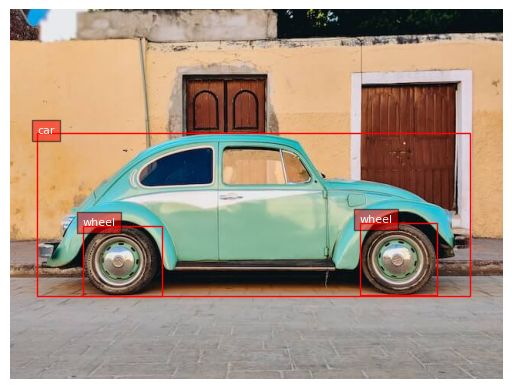

In [10]:
# Object detection
object_detection = tutu.object_detection(image)
print(f"object_detection: {object_detection}")
plot_bbox(image, object_detection["<OD>"])

dense_region_caption: {'<DENSE_REGION_CAPTION>': {'bboxes': [[34.880001068115234, 160.55999755859375, 597.4400024414062, 371.7599792480469], [454.0799865722656, 276.7200012207031, 553.9199829101562, 370.79998779296875], [94.4000015258789, 280.55999755859375, 196.8000030517578, 371.2799987792969]], 'labels': ['car', 'wheel', 'wheel']}}


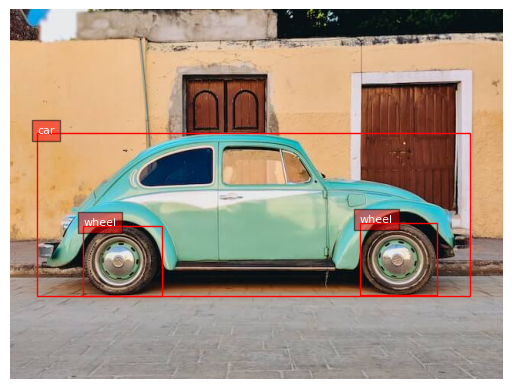

In [11]:
# Dense region caption
dense_region_caption = tutu.dense_region_caption(image)
print(f"dense_region_caption: {dense_region_caption}")
plot_bbox(image, dense_region_caption["<DENSE_REGION_CAPTION>"])

region_proposal: {'<REGION_PROPOSAL>': {'bboxes': [[34.880001068115234, 160.55999755859375, 597.4400024414062, 371.7599792480469]], 'labels': ['']}}


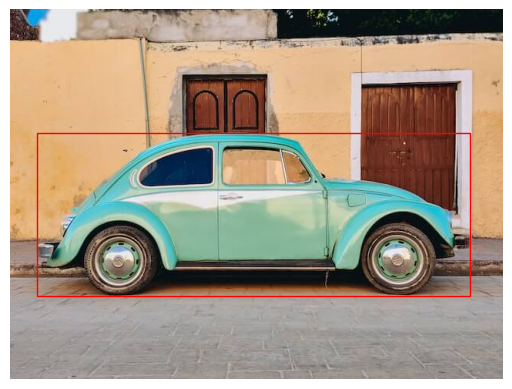

In [13]:
# Region proposal
region_proposal = tutu.region_proposal(image)
print(f"region_proposal: {region_proposal}")
plot_bbox(image, region_proposal["<REGION_PROPOSAL>"])

phrase_grounding: {'<CAPTION_TO_PHRASE_GROUNDING>': {'bboxes': [[35.52000045776367, 159.1199951171875, 583.3599853515625, 375.1199951171875], [0.3199999928474426, 0.23999999463558197, 639.0399780273438, 304.55999755859375]], 'labels': ['A green car', 'a yellow building']}}


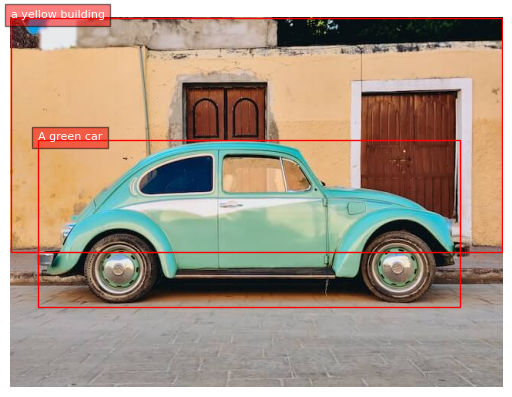

In [32]:
# Phrase Grounding
phrase_grounding = tutu.phrase_grounding(image, "A green car parked in front of a yellow building.")
print(f"phrase_grounding: {phrase_grounding}")
plot_bbox(image, phrase_grounding["<CAPTION_TO_PHRASE_GROUNDING>"])

In [18]:
# 英文 OCR 任务
image_path = "tests/images/en_ocr_test_case.png"
image = Image.open(image_path)

In [19]:
# OCR
ocr = tutu.ocr(image)
print(f"ocr: {ocr}")

ocr: {'<OCR>': 'CUDAFOR ENGINEERSAn Introduction to High-PerformanceParallel ComputingDUANE STORYIMETE YURTOGLU'}


In [20]:
# OCR wth Region
ocr_with_region = tutu.ocr_with_region(image)
print(f"ocr_with_region: {ocr_with_region}")
output_image = copy.deepcopy(image)
w, h = output_image.size
scale = 800 / max(w, h)
new_output_image = output_image.resize((int(w * scale), int(h * scale)))
draw_ocr_bboxes(new_output_image, ocr_with_region['<OCR_WITH_REGION>'], scale=scale)


ocr_with_region: {'<OCR_WITH_REGION>': {'quad_boxes': [[167.44650268554688, 50.25, 374.9914855957031, 50.25, 374.9914855957031, 114.25, 167.44650268554688, 114.25], [144.8784942626953, 121.25, 374.9914855957031, 120.75, 374.9914855957031, 148.75, 144.8784942626953, 149.25], [115.4594955444336, 165.75, 376.6034851074219, 165.75, 376.6034851074219, 183.75, 115.4594955444336, 183.75], [239.9864959716797, 184.75, 376.6034851074219, 185.75, 376.6034851074219, 203.75, 239.9864959716797, 202.25], [266.1814880371094, 441.25, 376.20050048828125, 441.25, 376.20050048828125, 456.25, 266.1814880371094, 456.25], [251.67349243164062, 459.75, 376.20050048828125, 459.75, 376.20050048828125, 474.75, 251.67349243164062, 474.75]], 'labels': ['</s>CUDA', 'FOR ENGINEERS', 'An Introduction to High-Performance', 'Parallel Computing', 'DUANE STORYI', 'METE YURTOGLU']}}


In [21]:
# 中文 OCR 任务
image_path = "tests/images/zh_ocr_test_case.png"
image = Image.open(image_path)

In [22]:
# OCR
ocr = tutu.ocr(image)
print(f"ocr: {ocr}")

ocr: {'<OCR>': '20. (人)少技 10月)限公司, RIABCH, ZC-90, BDY/ABC(设计)以月, DF LBDX AB TTFF, ABDF以社酒训议, M,许记访论讝讱讯讉订让讇變讀, BED F F F, 计讓认讚讵讛讹讈, 管F, F.N.(1)管: AC(OO)高: AC (OOO)讟讫讠:(2) AFF-1, tan/N=4, ROO讲讣讗讘;3(3) (2) 箧讄F, 記讦讋讜.DACM0BN'}


In [23]:
# OCR wth Region
ocr_with_region = tutu.ocr_with_region(image)
print(f"ocr_with_region: {ocr_with_region}")
output_image = copy.deepcopy(image)
w, h = output_image.size
scale = 800 / max(w, h)
new_output_image = output_image.resize((int(w * scale), int(h * scale)))
draw_ocr_bboxes(new_output_image, ocr_with_region['<OCR_WITH_REGION>'], scale=scale)

ocr_with_region: {'<OCR_WITH_REGION>': {'quad_boxes': [[30.744998931884766, 18.912500381469727, 251.16299438476562, 18.912500381469727, 251.16299438476562, 38.04750061035156, 30.744998931884766, 38.04750061035156], [70.47699737548828, 46.9474983215332, 250.2169952392578, 46.9474983215332, 250.2169952392578, 67.86249542236328, 70.47699737548828, 67.86249542236328], [33.58300018310547, 46.9474983215332, 917.14697265625, 46.9474983215332, 917.14697265625, 67.86249542236328, 33.58300018310547, 67.86249542236328], [33.58300018310547, 74.09249877929688, 894.4429931640625, 74.09249877929688, 894.4429931640625, 95.00749969482422, 33.58300018310547, 95.00749969482422], [40.20499801635742, 103.01750183105469, 289.00299072265625, 103.01750183105469, 289.00299072265625, 124.37749481201172, 40.20499801635742, 124.37749481201172], [40.20499801635742, 143.0675048828125, 468.74298095703125, 143.0675048828125, 468.74298095703125, 164.87249755859375, 40.20499801635742, 164.87249755859375], [255.89299011